# Preprocessing Kotliarov et al. CITE-seq dataset.
See https://www.nature.com/articles/s41591-020-0769-8. Data is avaliable at https://nih.figshare.com/articles/dataset/CITE-seq_protein-mRNA_single_cell_data_from_high_and_low_vaccine_responders_to_reproduce_Figs_4-6_and_associated_Extended_Data_Figs_/11349761?file=20706645.

In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns

sc.logging.print_versions()

scanpy==1.4.6 anndata==0.7.3 umap==0.4.6 numpy==1.19.4 scipy==1.5.4 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.6.1


In [2]:
RNA_DIR = '../data/kotliarov-2020/rna/'
CITE_DIR = '../data/kotliarov-2020/cite/'
META_DIR = '../data/kotliarov-2020/'

# Download and parse the data

First we extract the raw counts for rna and cite assays.

In [3]:
!wget -O "../data/kotliarov-2020/H1_day0_demultilexed_singlets.rds" https://nih.figshare.com/ndownloader/files/20706642

--2021-01-07 17:22:55--  https://nih.figshare.com/ndownloader/files/20706642
Resolving nih.figshare.com (nih.figshare.com)... 99.81.178.193, 63.34.0.204
Connecting to nih.figshare.com (nih.figshare.com)|99.81.178.193|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pstorage-nih-eu-8068553525/20706642/H1_day0_demultilexed_singlets.RDS [following]
--2021-01-07 17:22:56--  https://s3-eu-west-1.amazonaws.com/pstorage-nih-eu-8068553525/20706642/H1_day0_demultilexed_singlets.RDS
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.37.91
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.37.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 499125113 (476M) [application/octet-stream]
Saving to: ‘../data/kotliarov-2020/H1_day0_demultilexed_singlets.rds’

../data/kotliarov-2 100%[===================>] 476,00M   704KB/s    in 12m 8s  

2021-01-07 17:35:04 (6

In [5]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
%%R
library(Matrix)
df = readRDS('../data/kotliarov-2020/H1_day0_demultilexed_singlets.rds')
# save rna assay to later read into anndata object
writeMM(obj = df@data, file='../data/kotliarov-2020/rna/matrix.mtx')
gene_names = as.data.frame(df@data@Dimnames[1])
colnames(gene_names) = c('name')
write.csv(gene_names, '../data/kotliarov-2020/rna/gene_names.csv')
cell_names = as.data.frame(df@data@Dimnames[2])
colnames(cell_names) = c('name')
write.csv(cell_names, '../data/kotliarov-2020/cell_names.csv')
# save cite assay to later read into anndata object
writeMM(obj = df@assay[["CITE"]]@raw.data, file='../data/kotliarov-2020/cite/matrix.mtx')
protein_names = as.data.frame(df@assay[["CITE"]]@raw.data@Dimnames[1])
colnames(protein_names) = c('name')
write.csv(protein_names, '../data/kotliarov-2020/cite/protein_names.csv')

Next we need to extract cell labels from another file.

In [9]:
!wget -O "../data/kotliarov-2020/H1_day0_scranNorm_adtbatchNorm_dist_clustered_TSNE_labels.rds" https://nih.figshare.com/ndownloader/files/20706645

--2021-01-07 17:39:25--  https://nih.figshare.com/ndownloader/files/20706645
Resolving nih.figshare.com (nih.figshare.com)... 63.34.0.204, 99.81.178.193
Connecting to nih.figshare.com (nih.figshare.com)|63.34.0.204|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pstorage-nih-eu-8068553525/20706645/H1_day0_scranNorm_adtbatchNorm_dist_clustered_TSNE_labels.rds [following]
--2021-01-07 17:39:26--  https://s3-eu-west-1.amazonaws.com/pstorage-nih-eu-8068553525/20706645/H1_day0_scranNorm_adtbatchNorm_dist_clustered_TSNE_labels.rds
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.41.171
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.41.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 591964106 (565M) [application/octet-stream]
Saving to: ‘../data/kotliarov-2020/H1_day0_scranNorm_adtbatchNorm_dist_clustered_TSNE_labels.rds’

../data/kotliarov-2

In [30]:
%%R
df_labels = readRDS('../data/kotliarov-2020/H1_day0_scranNorm_adtbatchNorm_dist_clustered_TSNE_labels.rds')
anno = cbind(df_labels@meta.data[["barcode_check"]], df_labels@meta.data[["batch"]], df_labels@meta.data[["K1"]], df_labels@meta.data[["K2"]], df_labels@meta.data[["K3"]], df_labels@meta.data[["sample"]])
write.csv(anno, "../data/kotliarov-2020/annotation.csv", row.names = FALSE)

In [31]:
%%R
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS:   /Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/numpy/.dylibs/libopenblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] Matrix_1.2-18

loaded via a namespace (and not attached):
[1] compiler_4.0.3  grid_4.0.3      lattice_0.20-41


## Read the data into AnnData objects

### RNA

In [32]:
scrna = sc.read_mtx(RNA_DIR+'matrix.mtx')
scrna

AnnData object with n_obs × n_vars = 32738 × 58654

In [33]:
scrna = scrna.transpose()
scrna

AnnData object with n_obs × n_vars = 58654 × 32738

In [34]:
genes=pd.read_csv(RNA_DIR+'gene_names.csv',index_col=0)
scrna.var_names = list(genes['name'])
scrna.var_names

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2.1', 'AL590523.1', 'CT476828.1', 'PNRC2.1', 'SRSF10.1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)

In [35]:
obs=pd.read_csv(META_DIR+'cell_names.csv',index_col=0)
scrna.obs_names = list(obs['name'])
scrna.obs_names

Index(['AAACCTGAGAGCCCAA_H1B1ln1', 'AAACCTGAGGCGTACA_H1B1ln1',
       'AAACCTGCAGGTGGAT_H1B1ln1', 'AAACCTGCAGTATCTG_H1B1ln1',
       'AAACCTGCATCACAAC_H1B1ln1', 'AAACCTGCATGGTCAT_H1B1ln1',
       'AAACCTGGTAGAGTGC_H1B1ln1', 'AAACCTGGTTACCAGT_H1B1ln1',
       'AAACCTGGTTCGGGCT_H1B1ln1', 'AAACCTGTCAAAGTAG_H1B1ln1',
       ...
       'TTTGTCAAGAAGGACA_H1B2ln6', 'TTTGTCAAGCGATCCC_H1B2ln6',
       'TTTGTCACACCGAAAG_H1B2ln6', 'TTTGTCACAGAAGCAC_H1B2ln6',
       'TTTGTCAGTACGACCC_H1B2ln6', 'TTTGTCAGTCAAACTC_H1B2ln6',
       'TTTGTCATCCCATTTA_H1B2ln6', 'TTTGTCATCGAGAACG_H1B2ln6',
       'TTTGTCATCGGTTCGG_H1B2ln6', 'TTTGTCATCTACCTGC_H1B2ln6'],
      dtype='object', length=58654)

### CITE

In [36]:
cite = sc.read_mtx(CITE_DIR+'matrix.mtx')
cite

AnnData object with n_obs × n_vars = 87 × 58654

In [37]:
cite = cite.transpose()
cite

AnnData object with n_obs × n_vars = 58654 × 87

In [38]:
proteins=pd.read_csv(CITE_DIR+'protein_names.csv',index_col=0)
cite.var_names = list(proteins['name'])
cite.var_names

Index(['AnnexinV_PROT', 'BTLA_PROT', 'CD117_PROT', 'CD123_PROT', 'CD13_PROT',
       'CD133_PROT', 'CD134_PROT', 'CD137_PROT', 'CD141_PROT', 'CD152_PROT',
       'CD161_PROT', 'CD163_PROT', 'CD18_PROT', 'CD184_PROT', 'CD19_PROT',
       'CD1c_PROT', 'CD1d_PROT', 'CD2_PROT', 'CD206_PROT', 'CD21_PROT',
       'CD223_PROT', 'CD24_PROT', 'CD244_PROT', 'CD273_PROT', 'CD294_PROT',
       'CD3_PROT', 'CD303_PROT', 'CD32_PROT', 'CD357_PROT', 'CD366_PROT',
       'CD39_PROT', 'CD40_PROT', 'CD57_PROT', 'CD62L_PROT', 'CD64_PROT',
       'CD69_PROT', 'CD70_PROT', 'CD71_PROT', 'HLA-ABC_PROT', 'HLA-DR_PROT',
       'IgA_PROT', 'KLRG1_PROT', 'TCRgd_PROT', 'CX3CR1_PROT', 'CD10_PROT',
       'CD11c_PROT', 'CD138_PROT', 'CD14_PROT', 'CD16_PROT', 'CD185_PROT',
       'CD195_PROT', 'CD196_PROT', 'CD197_PROT', 'CD25_PROT', 'CD27_PROT',
       'CD278 _PROT', 'CD279_PROT', 'CD31_PROT', 'CD314 _PROT', 'CD38_PROT',
       'CD4_PROT', 'CD45RA_PROT', 'CD56_PROT', 'CD8_PROT', 'IgD_PROT',
       'IgM_PROT', 'Mouse

In [39]:
cite.obs_names = list(obs['name'])
cite.obs_names

Index(['AAACCTGAGAGCCCAA_H1B1ln1', 'AAACCTGAGGCGTACA_H1B1ln1',
       'AAACCTGCAGGTGGAT_H1B1ln1', 'AAACCTGCAGTATCTG_H1B1ln1',
       'AAACCTGCATCACAAC_H1B1ln1', 'AAACCTGCATGGTCAT_H1B1ln1',
       'AAACCTGGTAGAGTGC_H1B1ln1', 'AAACCTGGTTACCAGT_H1B1ln1',
       'AAACCTGGTTCGGGCT_H1B1ln1', 'AAACCTGTCAAAGTAG_H1B1ln1',
       ...
       'TTTGTCAAGAAGGACA_H1B2ln6', 'TTTGTCAAGCGATCCC_H1B2ln6',
       'TTTGTCACACCGAAAG_H1B2ln6', 'TTTGTCACAGAAGCAC_H1B2ln6',
       'TTTGTCAGTACGACCC_H1B2ln6', 'TTTGTCAGTCAAACTC_H1B2ln6',
       'TTTGTCATCCCATTTA_H1B2ln6', 'TTTGTCATCGAGAACG_H1B2ln6',
       'TTTGTCATCGGTTCGG_H1B2ln6', 'TTTGTCATCTACCTGC_H1B2ln6'],
      dtype='object', length=58654)

# Annotation

In [40]:
anno = pd.read_csv(META_DIR+'annotation.csv')

## Data Cleaning

In [41]:
anno

,V1,V2,V3,V4,V5,V6
0,AAACCTGAGAGCCCAA_H1B1ln1,1,C5,C5.0,C5.0.0,256_d0
1,AAACCTGAGGCGTACA_H1B1ln1,1,C6,C6.0,C6.0.0,273_d0
2,AAACCTGCAGGTGGAT_H1B1ln1,1,C0,C0.0,C0.0.0,256_d0
3,AAACCTGCAGTATCTG_H1B1ln1,1,C0,C0.0,C0.0.0,200_d0
4,AAACCTGCATCACAAC_H1B1ln1,1,C2,C2.0,C2.0.0,233_d0
...,...,...,...,...,...,...
53196,TTTGTCAGTACGACCC_H1B2ln6,2,C7,C7.0,C7.0.0,205_d0
53197,TTTGTCAGTCAAACTC_H1B2ln6,2,C7,C7.0,C7.0.0,205_d0
53198,TTTGTCATCCCATTTA_H1B2ln6,2,C5,C5.0,C5.0.0,268_d0
53199,TTTGTCATCGAGAACG_H1B2ln6,2,C2,C2.0,C2.0.0,234_d0


In [42]:
anno = anno.rename(columns={"V1": "cell", "V2": "batch", "V3": "cluster_level1", "V4": "cluster_level2", "V5": "cluster_level3", "V6": "sample"})

In [43]:
anno["batch"] = anno["batch"].astype('category')

In [44]:
anno = anno.set_index('cell')

In [45]:
anno

,batch,cluster_level1,cluster_level2,cluster_level3,sample
cell,,,,,
AAACCTGAGAGCCCAA_H1B1ln1,1,C5,C5.0,C5.0.0,256_d0
AAACCTGAGGCGTACA_H1B1ln1,1,C6,C6.0,C6.0.0,273_d0
AAACCTGCAGGTGGAT_H1B1ln1,1,C0,C0.0,C0.0.0,256_d0
AAACCTGCAGTATCTG_H1B1ln1,1,C0,C0.0,C0.0.0,200_d0
AAACCTGCATCACAAC_H1B1ln1,1,C2,C2.0,C2.0.0,233_d0
...,...,...,...,...,...
TTTGTCAGTACGACCC_H1B2ln6,2,C7,C7.0,C7.0.0,205_d0
TTTGTCAGTCAAACTC_H1B2ln6,2,C7,C7.0,C7.0.0,205_d0
TTTGTCATCCCATTTA_H1B2ln6,2,C5,C5.0,C5.0.0,268_d0


Remane the clusters using names from Figure 4b from the paper (https://www.nature.com/articles/s41591-020-0769-8).

In [46]:
level1_names = [
    'CD4 naive', 
    'CD4 memory T', 
    'Classical monocytes and mDC', 
    'B',  
    'CD8 memory T',
    'NK', 
    'CD8 naive', 
    'Unconventional T cells', 
    'Non-classical monocytes', 
    'pDC'
]

In [47]:
level2_names = [
    'CD4 naive', 'Double-negative T',
    'CD4 central and transitional memory T', 'CD4 effector memory and temra',
    'Classical monocytes', 'mDC', 
    'Transitional B cells', 
    'Switched B cells', 
    'CD8 memory T',
    'NK',
    'CD8 naive', 
    'Unconventional T cells', 
    'Non-classical monocytes', 'pDC'
]

In [48]:
level3_names = [
    'CD4 naive', 'Double-negative T',
    'CD4 central and transitional memory T', 'CD4 effector memory and temra',
    'Classical monocytes', 'IgA monocytes', 'HSC',
    'mDC', 'Transitional B cells', 'Unswitched B cells',
    'Switched B cells', 'CD8 central and transitional memory T',
    'CD8 effector memory and temra', 'NKT-like (CD56+/CD3+)',
    'CD8+ CD103+ T', 'CD16++ NK', 'CD56h/CD16l NK', 'CD8 naive', 
    'CD161 double-negative T', 'Unconventional CD161h/CD8+ T',
    'Non-classical monocytes', 'pDC'
]

In [49]:
anno.cluster_level1 = anno.cluster_level1.astype('category')
anno.cluster_level1 = anno.cluster_level1.cat.rename_categories(level1_names)
anno.cluster_level2 = anno.cluster_level2.astype('category')
anno.cluster_level2 = anno.cluster_level2.cat.rename_categories(level2_names)
anno.cluster_level3 = anno.cluster_level3.astype('category')
anno.cluster_level3 = anno.cluster_level3.cat.rename_categories(level3_names)

In [50]:
anno

,batch,cluster_level1,cluster_level2,cluster_level3,sample
cell,,,,,
AAACCTGAGAGCCCAA_H1B1ln1,1,NK,NK,CD16++ NK,256_d0
AAACCTGAGGCGTACA_H1B1ln1,1,CD8 naive,CD8 naive,CD8 naive,273_d0
AAACCTGCAGGTGGAT_H1B1ln1,1,CD4 naive,CD4 naive,CD4 naive,256_d0
AAACCTGCAGTATCTG_H1B1ln1,1,CD4 naive,CD4 naive,CD4 naive,200_d0
AAACCTGCATCACAAC_H1B1ln1,1,Classical monocytes and mDC,Classical monocytes,Classical monocytes,233_d0
...,...,...,...,...,...
TTTGTCAGTACGACCC_H1B2ln6,2,Unconventional T cells,Unconventional T cells,CD161 double-negative T,205_d0
TTTGTCAGTCAAACTC_H1B2ln6,2,Unconventional T cells,Unconventional T cells,CD161 double-negative T,205_d0
TTTGTCATCCCATTTA_H1B2ln6,2,NK,NK,CD16++ NK,268_d0


### Annotate RNA

In [51]:
scrna.obs = scrna.obs.join(anno, how='left', sort=False)

In [52]:
scrna = scrna[~scrna.obs['cluster_level1'].isnull()]

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [53]:
scrna.obs['cell_type'] = scrna.obs['cluster_level1']
del scrna.obs['cluster_level1']
scrna.obs

Trying to set attribute `.obs` of view, copying.


,batch,cluster_level2,cluster_level3,sample,cell_type
AAACCTGAGAGCCCAA_H1B1ln1,1,NK,CD16++ NK,256_d0,NK
AAACCTGAGGCGTACA_H1B1ln1,1,CD8 naive,CD8 naive,273_d0,CD8 naive
AAACCTGCAGGTGGAT_H1B1ln1,1,CD4 naive,CD4 naive,256_d0,CD4 naive
AAACCTGCAGTATCTG_H1B1ln1,1,CD4 naive,CD4 naive,200_d0,CD4 naive
AAACCTGCATCACAAC_H1B1ln1,1,Classical monocytes,Classical monocytes,233_d0,Classical monocytes and mDC
...,...,...,...,...,...
TTTGTCAGTACGACCC_H1B2ln6,2,Unconventional T cells,CD161 double-negative T,205_d0,Unconventional T cells
TTTGTCAGTCAAACTC_H1B2ln6,2,Unconventional T cells,CD161 double-negative T,205_d0,Unconventional T cells
TTTGTCATCCCATTTA_H1B2ln6,2,NK,CD16++ NK,268_d0,NK
TTTGTCATCGAGAACG_H1B2ln6,2,Classical monocytes,Classical monocytes,234_d0,Classical monocytes and mDC


### Annotate CITE

In [54]:
cite.obs = cite.obs.join(anno, how='left', sort=False)

In [55]:
cite = cite[~cite.obs['cluster_level1'].isnull()]
cite.obs['cell_type'] = cite.obs['cluster_level1']
del cite.obs['cluster_level1']
cite.obs

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Trying to set attribute `.obs` of view, copying.


,batch,cluster_level2,cluster_level3,sample,cell_type
AAACCTGAGAGCCCAA_H1B1ln1,1,NK,CD16++ NK,256_d0,NK
AAACCTGAGGCGTACA_H1B1ln1,1,CD8 naive,CD8 naive,273_d0,CD8 naive
AAACCTGCAGGTGGAT_H1B1ln1,1,CD4 naive,CD4 naive,256_d0,CD4 naive
AAACCTGCAGTATCTG_H1B1ln1,1,CD4 naive,CD4 naive,200_d0,CD4 naive
AAACCTGCATCACAAC_H1B1ln1,1,Classical monocytes,Classical monocytes,233_d0,Classical monocytes and mDC
...,...,...,...,...,...
TTTGTCAGTACGACCC_H1B2ln6,2,Unconventional T cells,CD161 double-negative T,205_d0,Unconventional T cells
TTTGTCAGTCAAACTC_H1B2ln6,2,Unconventional T cells,CD161 double-negative T,205_d0,Unconventional T cells
TTTGTCATCCCATTTA_H1B2ln6,2,NK,CD16++ NK,268_d0,NK
TTTGTCATCGAGAACG_H1B2ln6,2,Classical monocytes,Classical monocytes,234_d0,Classical monocytes and mDC


# Preproces scRNA-seq

## Data Cleaning

In [56]:
sc.pp.filter_cells(scrna, min_genes=1)
sc.pp.filter_genes(scrna, min_cells=1)
scrna

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


AnnData object with n_obs × n_vars = 53201 × 23418
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes'
    var: 'n_cells'

## Quality Control

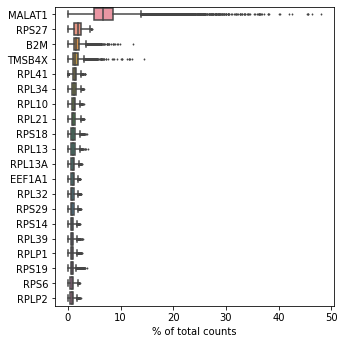

In [57]:
sc.pl.highest_expr_genes(scrna, n_top=20)

In [58]:
scrna.var['mt'] = scrna.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(scrna, qc_vars=['mt'], percent_top=None, inplace=True)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'sample' as categorical
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/alitine

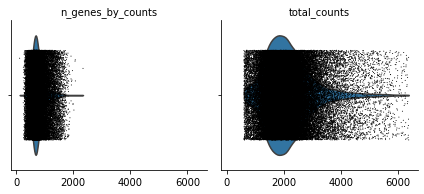

In [59]:
sc.pl.violin(scrna, ['n_genes_by_counts', 'total_counts'], jitter=0.3, multi_panel=True)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


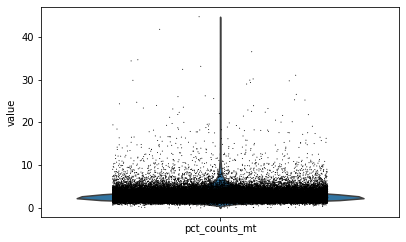

In [60]:
sc.pl.violin(scrna, ['pct_counts_mt'], jitter=0.3)

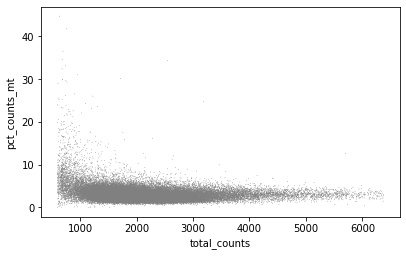

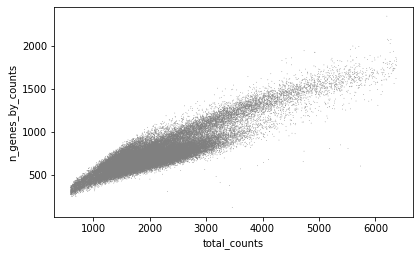

In [61]:
sc.pl.scatter(scrna, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(scrna, x='total_counts', y='n_genes_by_counts')

In [62]:
sc.pp.filter_cells(scrna, min_genes=100)
sc.pp.filter_genes(scrna, min_cells=3)
scrna = scrna[scrna.obs.n_genes_by_counts < 1500, :]
scrna = scrna[scrna.obs.pct_counts_mt < 10, :]
scrna

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 52117 × 20245
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [63]:
scrna.raw = scrna

## Normalization

In [64]:
sc.pp.normalize_total(scrna, target_sum=1e4)
sc.pp.log1p(scrna)

## Visualization

In [65]:
sc.tl.pca(scrna, random_state=0, svd_solver='arpack', n_comps=50)

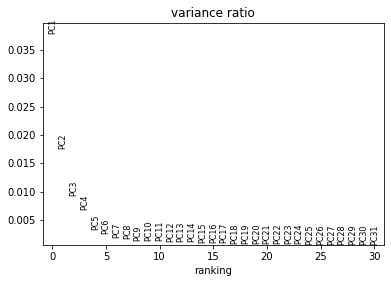

In [66]:
sc.pl.pca_variance_ratio(scrna)

In [67]:
sc.pp.neighbors(scrna, n_pcs=10)
sc.tl.umap(scrna)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/tools/_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),


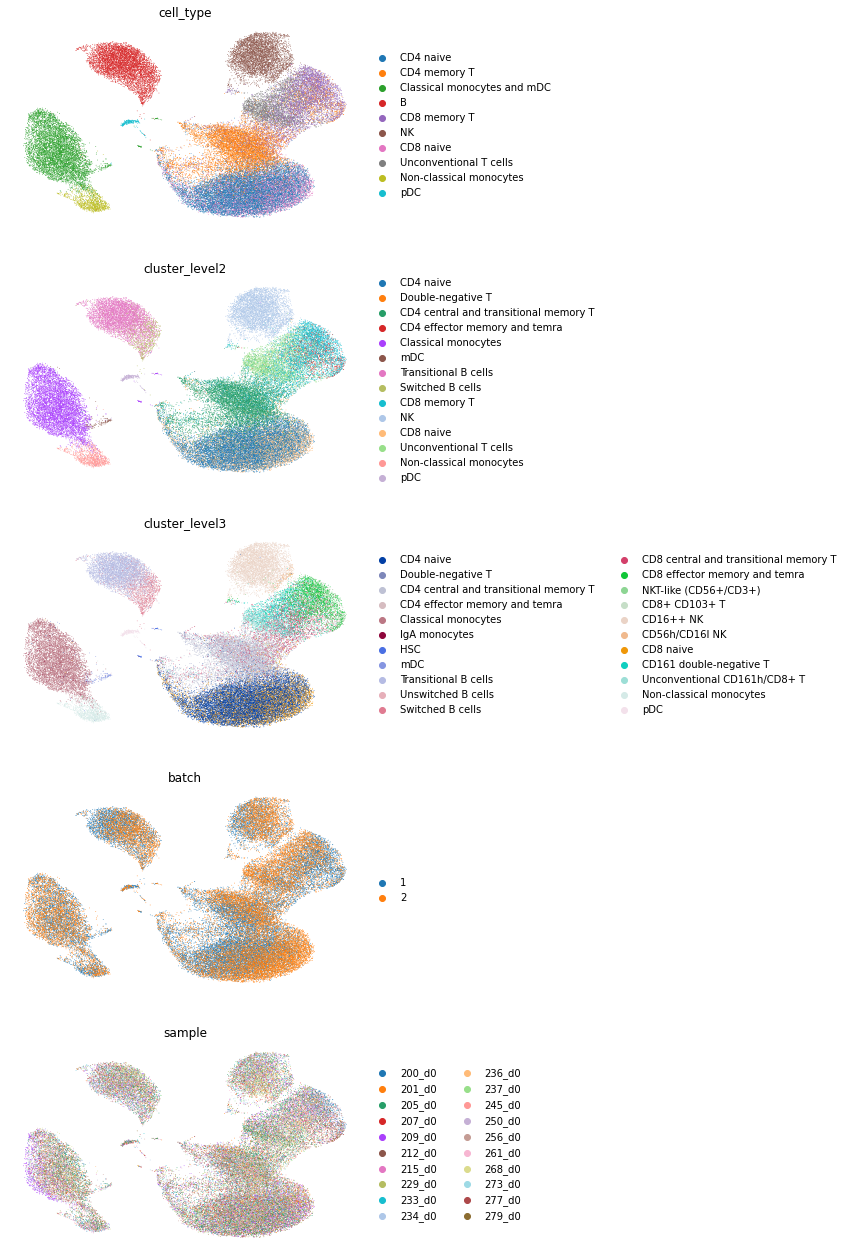

In [68]:
sc.pl.umap(scrna, color=['cell_type', 'cluster_level2', 'cluster_level3', 'batch', 'sample'], frameon=False, ncols=1)

## Highly variable genes

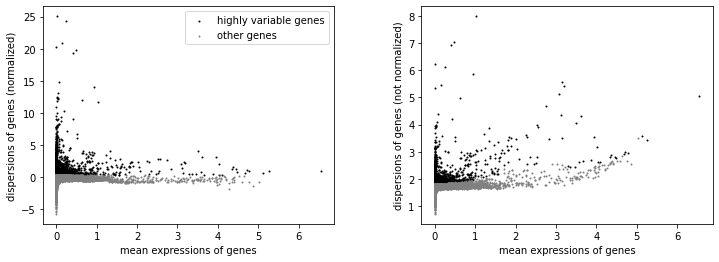

number of highly variable genes = 3999


In [69]:
sc.pp.highly_variable_genes(scrna, n_top_genes=4000)
sc.pl.highly_variable_genes(scrna)
print('number of highly variable genes =', scrna.var.highly_variable.sum())

In [70]:
scrna_hvg = scrna[:, scrna.var.highly_variable]
scrna_hvg

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 52117 × 3999
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'cell_type_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'batch_colors', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [71]:
scrna.layers['count'] = scrna.raw.X
del scrna.raw

In [72]:
scrna_hvg.layers['count'] = scrna_hvg.raw[:, scrna.var.highly_variable].X
del scrna_hvg.raw

# Preproces CITE-seq

In [73]:
sc.pp.filter_cells(cite, min_genes=1)
sc.pp.filter_genes(cite, min_cells=1)
cite

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


AnnData object with n_obs × n_vars = 53201 × 87
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes'
    var: 'n_cells'

In [74]:
cite.raw = cite

In [75]:
cite.layers['count'] = cite.raw.X
del cite.raw

## Normalization
Taken from https://github.com/theislab/scanpy/issues/1208, also discussed in https://github.com/theislab/scanpy/pull/1117.

In [76]:
def clr_normalize_each_cell(adata, inplace=True):
    """Normalize count vector for each cell, i.e. for each row of .X"""

    import numpy as np
    import scipy

    def seurat_clr(x):
        # TODO: support sparseness
        s = np.sum(np.log1p(x[x > 0]))
        exp = np.exp(s / len(x))
        return np.log1p(x / exp)

    if not inplace:
        adata = adata.copy()

    # apply to dense or sparse matrix, along axis. returns dense matrix
    adata.X = np.apply_along_axis(
        seurat_clr, 1, (adata.X.A if scipy.sparse.issparse(adata.X) else adata.X)
    )
    return adata

In [77]:
cite = clr_normalize_each_cell(cite)

## Visualization

In [78]:
sc.tl.pca(cite, random_state=0, svd_solver='arpack', use_highly_variable=False)

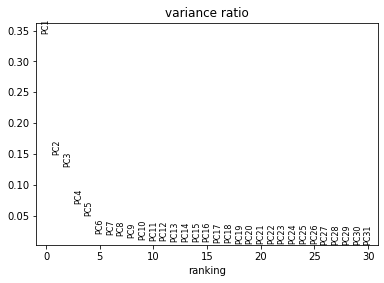

In [79]:
sc.pl.pca_variance_ratio(cite)

In [80]:
sc.pp.neighbors(cite)
sc.tl.umap(cite)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/scanpy/tools/_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),


/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'sample' as categorical


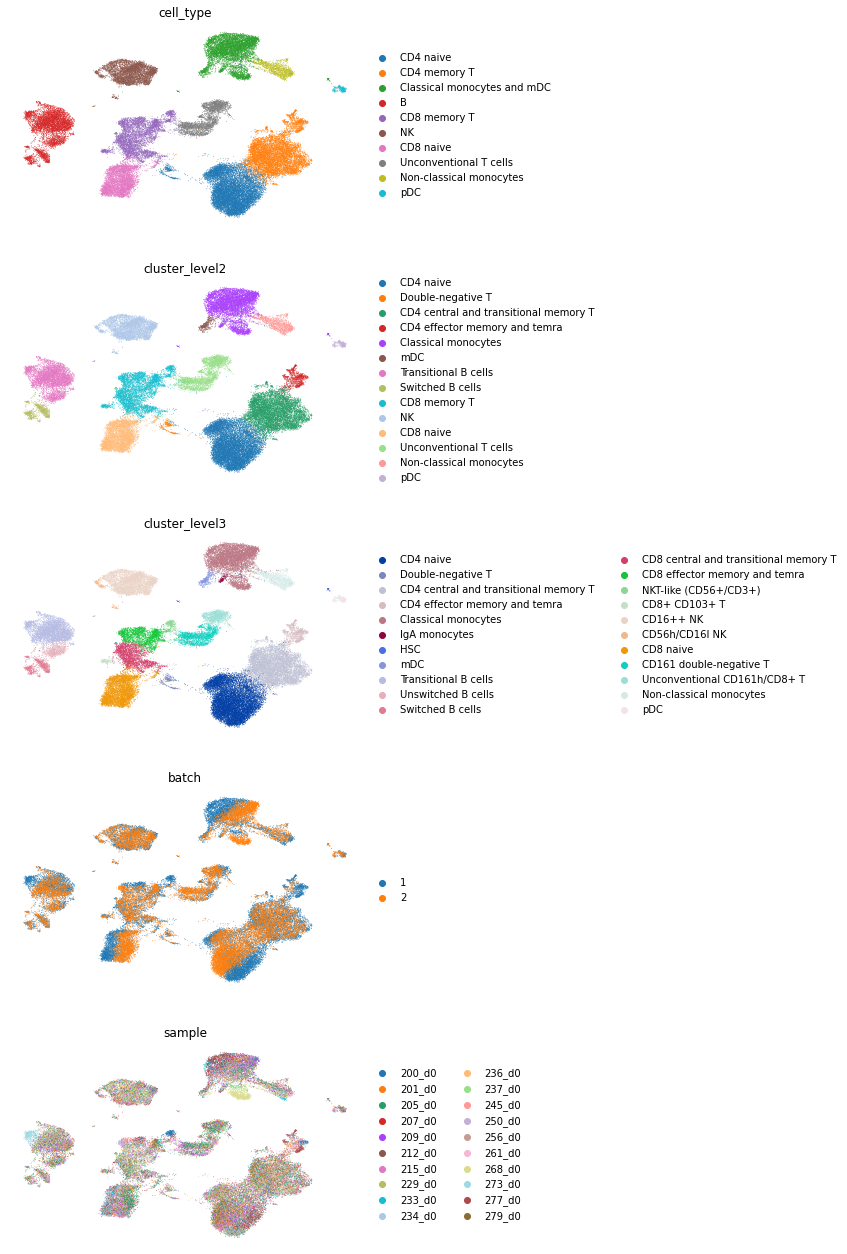

In [81]:
sc.pl.umap(cite, color=['cell_type', 'cluster_level2', 'cluster_level3', 'batch', 'sample'], frameon=False, ncols=1)

# Save the results

## All genes

In [82]:
com_index = scrna.obs.index.intersection(cite.obs.index)
scrna_all = scrna[com_index]
cite_all = cite[com_index]
print(scrna_all.shape, cite_all.shape)

(52117, 20245) (52117, 87)


/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [88]:
scrna_all.write(RNA_DIR + 'expressions.h5ad')
cite_all.write(CITE_DIR + 'protein.h5ad')

## Only hvg

In [89]:
com_index = scrna_hvg.obs.index.intersection(cite.obs.index)
scrna_hvg = scrna_hvg[com_index]
cite = cite[com_index]
print(scrna_hvg.shape, cite.shape)

(52117, 3999) (52117, 87)


/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [92]:
scrna_hvg.write(RNA_DIR + 'expressions_hvg.h5ad')

Remove unnecessary files.

In [94]:
!rm "../data/kotliarov-2020/H1_day0_demultilexed_singlets.rds"
!rm "../data/kotliarov-2020/H1_day0_scranNorm_adtbatchNorm_dist_clustered_TSNE_labels.rds" 